In [1]:
import numpy as np
import math
import torch
import matplotlib.pyplot as plt

1. アトミックポテンシャル

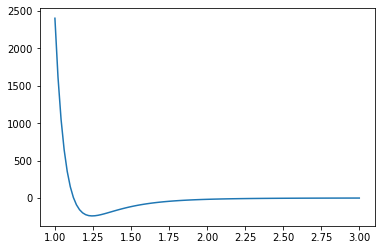

In [13]:
#*レナードジョーンズ
def e_(epsilon, sigma, r):
    return 4*(12/sigma*((sigma/r)**13) - 6/sigma*((sigma/r)**7))

epsilon = 1
sigma = 0.01
r = np.linspace(0.01, 0.03, 100)
energy = e_(epsilon, sigma, r)

plt.plot(r/sigma, energy/epsilon)

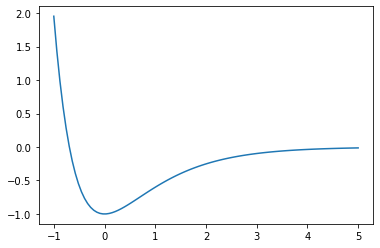

In [2]:
#*モース
def e_(d, alpha, r_r0):
    return d*(np.exp(-2*alpha*r_r0) - 2*np.exp(-alpha*r_r0))

d, alpha = 1, 1
r_r0 = np.linspace(-1, 5, 100)
energy = e_(d, alpha, r_r0)

plt.plot(alpha*r_r0, energy/d)

In [3]:
3.516/math.sqrt(2)

2.486187442651901

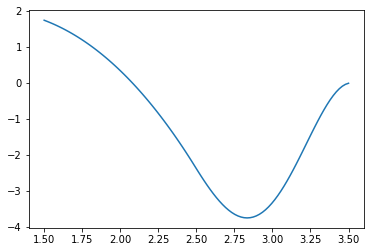

In [52]:
#*SW
#*Pair
def cutoff(r, r1=2.49, r2=3.516):
    ind_1 = np.where(r <= r1)[0]
    ind_2 = np.where(r <= r2)[0]
    ind_2 = np.where(~np.in1d(ind_2, ind_1))[0]
    r_ = np.zeros(len(r))
    for i in ind_1:
        r_[i] = 1
    for i in ind_2:
        r_[i] = 1/2*(1+np.cos(math.pi*(r[i]-r1)/(r2-r1)))

    return r_

def e_(a=1, lamda_a=1, b=1, lamda_b=1, r=1):
    return cutoff(r)*(a*r**lamda_a-b*r**lamda_b)

r = np.linspace(1.5, 3.5, 100)
energy = e_(a=3, lamda_a=1, b=1, lamda_b=2.5, r=r)

plt.plot(r, energy)